Train and test a simple deep CNN on the MNIST dataset.

In [2]:
from __future__ import print_function
import numpy as np
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential                               # import Sequential class to package neural network layers
from keras.layers import Dense, Dropout, Activation, Flatten      # import fully-connected layer Dense, activating layer Activation and Dropout layer
from keras.layers import Conv2D, MaxPooling2D                     # import Cov2D Convolutional layer
import os
import h5py                                                       # add import h5py in order to save model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd
import csv

%matplotlib inline

In [44]:
# Define parameter values
batch_size = 32                                                  # setting the number of samples in each batch
epochs = 12                                                      # setting the number of iterations, when training in each epoch, the training set will be trained once
num_classes = 10                                                 # setting the number of classes, there are 10 classes (0-9)

save_dir = os.path.join(os.getcwd(), 'saved_models')             # find the model
model_name = 'keras_cifar10_trained_model_run2.h5'

# MNIST: 60000 images in training set, 10000 images in test set
# Read the data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)                           # (60000, 28, 28)
print(x_train.shape[0], 'train samples')                         # 60000
print(x_test.shape[0], 'test samples')                           # 10000


# y_train is an array like [0][2][7][4][3][9]...convert it to a binary matrix. y_test is the same
# binary matrix: if the first element of y_train, then the first row of converted matrix is [1 0 0 0 0 0 0 0 0 0]; if the second is 2, then the seconde row is [0 0 1 0 0 0 0 0 0 0]
# each row representing each element in y_train, these rows stack into a matrix shape in 10000*10
# binary matrix is used to compute crossentropy in loss


# x_train is 60000*28*28 3D vector
# Convert class vectors to binary class matrices.
y_train_m = keras.utils.to_categorical(y_train, num_classes)
y_test_m = keras.utils.to_categorical(y_test, num_classes)



# Insert single channel dimension (mnist is grey-scale and not RGB)
if keras.backend.image_data_format() == 'channels_first':
    x_train = np.expand_dims(x_train,1)                         # axis=1 adjust to one column
    x_test = np.expand_dims(x_test,1)
else:
    x_train = np.expand_dims(x_train,3)
    x_test = np.expand_dims(x_test,3)
    
# Convert to floating point and rescale to [0 1]
x_train = x_train.astype('float32')                             # float32 more precise
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [61]:
# Define the CNN model
model = Sequential()

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),                        # Convolutional layer-1 32 channels(outputs) in this layer,activation function is relu, 3*3 pixel window
                 activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(128, (3, 3), activation='relu'))                # Convolutional layer-2 64 channels in this layer
model.add(MaxPooling2D(pool_size=(2, 2)))                       # Max-pooling layer, 2*2 pixel window
model.add(Dropout(0.25))                                        # use 25% probability to drop out the input (outputs from last layer) neurons to avoid overfitting






#-------------------------add new layers----------------------------------------- 
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#---------------------------------------------------------------------------------









model.add(Flatten())                                            # flatten all pixels, 28*28 -> 784
model.add(Dense(256, activation='relu'))                        # Dense layer connects all pixels, 128 outputs, activation function is relu
#对输出采用0.5概率的Dropout
model.add(Dropout(0.5))                                         # use 50% probability to drop out the input
model.add(Dense(num_classes, activation='softmax'))             # normalize the input using softmax activation function, return 0-9




# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,       # multiple classes - categorical_crossentropy
              optimizer=keras.optimizers.Adadelta(),            # optimizer - Adadelt
              metrics=['accuracy'])                             # evaluate metric - accuracy

# Train the model
model.fit(x_train, y_train_m,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,                                            # 1 - record the output loading bar; 2 - output one record of each epoch
          validation_data=(x_test, y_test_m))

# This part is moved to latter code
# Run the trained model on test data, outputting a probability distribution from each image
# output prediction probability
#y = model.predict(x_test)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name) 
model.save('model_path.h5')                                     # add .h5 to save the model
print('Saved trained model at %s ' % model_path)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 598s 10ms/step - loss: 0.1733 - acc: 0.9446 - val_loss: 0.0371 - val_acc: 0.9888
Epoch 2/12
60000/60000 [==============================] - 601s 10ms/step - loss: 0.0585 - acc: 0.9829 - val_loss: 0.0276 - val_acc: 0.9905
Epoch 3/12
60000/60000 [==============================] - 612s 10ms/step - loss: 0.0441 - acc: 0.9866 - val_loss: 0.0202 - val_acc: 0.9932
Epoch 4/12
60000/60000 [==============================] - 618s 10ms/step - loss: 0.0367 - acc: 0.9885 - val_loss: 0.0183 - val_acc: 0.9939
Epoch 5/12
60000/60000 [==============================] - 600s 10ms/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.0185 - val_acc: 0.9942
Epoch 6/12
60000/60000 [==============================] - 615s 10ms/step - loss: 0.0283 - acc: 0.9914 - val_loss: 0.0197 - val_acc: 0.9938
Epoch 7/12
60000/60000 [==============================] - 635s 11ms/step - loss: 0.0254 - acc: 0.9923 - val_loss: 0.

In [62]:
# Extension 1 - Evaluation of the model: loss and accuracy

# evaluate performance of model
# evaluate prediction accuracy and return a score, the 0 dim is loss, the other dims are other metric in metrics in compile process
loss, accuracy = model.evaluate(x_test, y_test_m, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# assess the model using f1score of sklearn
#f1score = metrics.f1_score(y_test, y_pred, average='micro')
#print(f1score)

10000/10000 [==============================] - 21s 2ms/step
Test loss: 0.016516964045581152
Test accuracy: 0.9948


In [56]:
# Extension 2 - Select the most probable class indices

# Run the trained model on test data, outputting a probability distribution from each image
# output predictions
y = model.predict(x_test)

#print('the predictions:\n', y)
#print('prediction y shape:', y.shape)

# select the index with the maximum probability
y_pred = np.argmax(y, axis = 1)                     # axis=0 - according to column; 1 - row 

results = pd.Series(y_pred)

print('final prediction results:\n', results)

# save the prediction results
record_count = 0
my_file = open('./output/results_9.txt','w')          # important!! don't forget to change the file name...
for _ in results:
    my_file.writelines(str(_))
    my_file.writelines('\n')
    record_count += 1
my_file.close()
print("The number of predictions: ", record_count)
print("Prediction finished")

final prediction results:
 0       7
1       2
2       1
3       0
4       4
5       1
6       4
7       9
8       5
9       9
10      0
11      6
12      9
13      0
14      1
15      5
16      9
17      7
18      3
19      4
20      9
21      6
22      6
23      5
24      4
25      0
26      7
27      4
28      0
29      1
       ..
9970    5
9971    2
9972    4
9973    9
9974    4
9975    3
9976    6
9977    4
9978    1
9979    7
9980    2
9981    6
9982    5
9983    0
9984    1
9985    2
9986    3
9987    4
9988    5
9989    6
9990    7
9991    8
9992    9
9993    0
9994    1
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: int64
The number of predictions:  10000
Prediction finished


Confusion maxtrix:
 [[ 976    0    0    0    1    0    1    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1026    0    0    0    1    2    0    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  980    0    1    0    0    1]
 [   0    0    0    5    0  886    1    0    0    0]
 [   2    2    0    0    2    1  949    0    2    0]
 [   0    3    2    0    0    0    0 1020    1    2]
 [   1    0    0    1    0    0    0    0  971    1]
 [   0    0    0    0    7    1    0    3    5  993]]


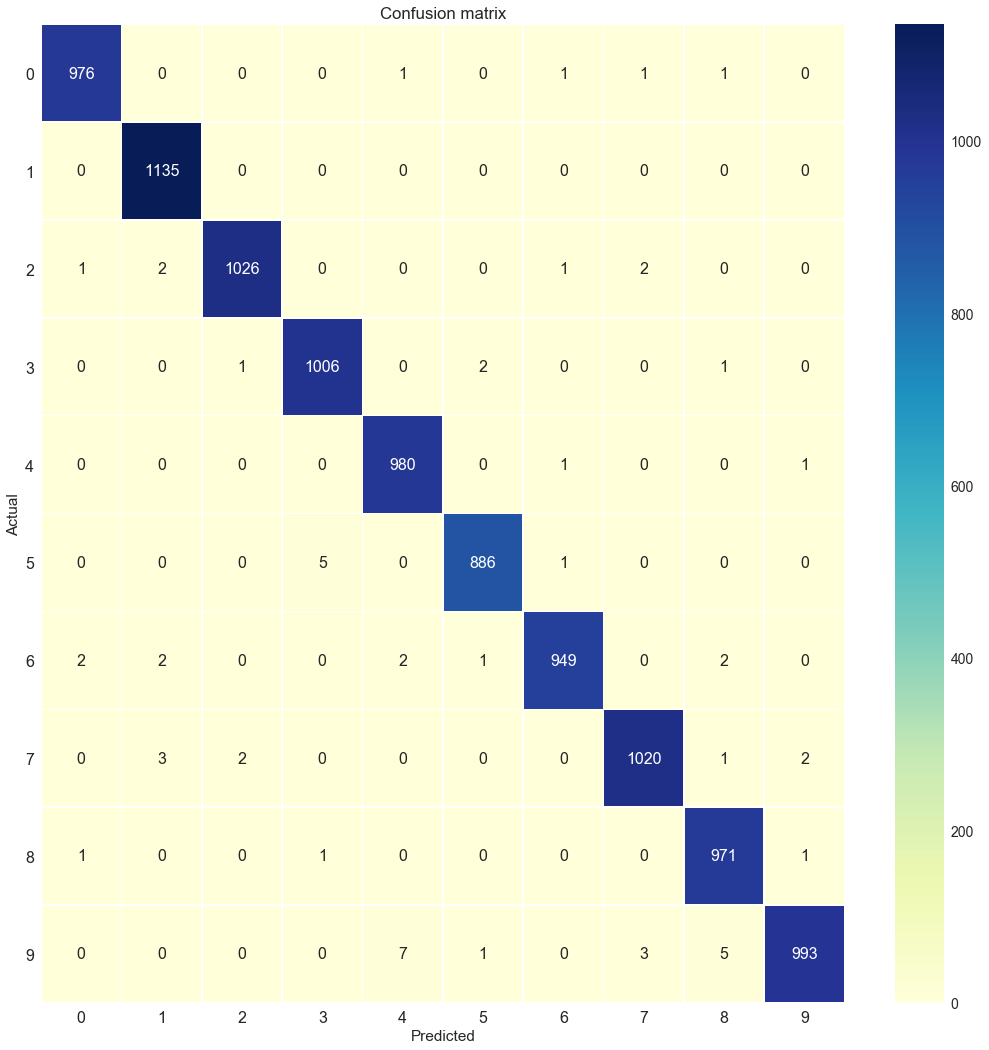

In [69]:
# Extension 3 - Confusion matrix

# define prediction test label and actual test label
#y_pred = np.argmax(y, axis = 1)     # is predicted in the last step
y_actual = np.argmax(y_test_m, axis = 1)

#print('y_prediction shape:', y_pred.shape)
#print('y_prediction:', y_pred)
#print('y_actual shape:', y_actual.shape)
#print('y_actual:', y_actual)

# define confusion matrix by skearn
conf_mat = confusion_matrix(y_true = y_actual, y_pred = y_pred)
print('Confusion maxtrix:\n', conf_mat)

# draw confusion matrix
f,ax = plt.subplots(figsize=(18, 18))                  # size
sns.set(font_scale=1.4)                               # adjust the text size

# draw confusion matrix using seaborn.heatmap
sns.heatmap(conf_mat, annot=True, annot_kws={'size':16}, linewidths=.5, fmt= 'd',cmap='YlGnBu', ax=ax)

# setting the axis
plt.title('Confusion matrix')
label_x = ax.get_xticklabels()
plt.setp(label_x, size = 16)
label_y = ax.get_yticklabels()
plt.setp(label_y, size = 16, rotation=360, horizontalalignment='right')

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


plt.show()

In [64]:
# Extension 4 - Display actual and predicted classes for all errors with the index and image

# find the errors by judging whether the prediction equals to actual label and then save into a list
error_list = (y_pred - y_actual)
#print(error_list)

# reversely, find the index of appearing errors
error_index = np.where(error_list != 0)
#print(error_index)
#print(error_index[0][0])

# reversely, find out the labels by using the error index
y_pred_errors = y_pred[error_index]                  # look up and define wrong prediction label, it is an array of wrong-predicted labels
count_errors = len(y_pred_errors)              # count the number of incorrectly classified images
y_actual_errors = y_actual[error_index]              # look up and define actual label, it is an array of original actual labels, they are wrong predicted to other class in the prediction process 
x_test_errors = x_test[error_index]                  # look up and define the test data of these errors for displaying them latter


print('The number of incorrectly classified images:\n',count_errors)
print('-------------------indices of incorrectly-classified images-------------------------')
print(error_index)
print('------------------------incorrect classified labels------------------------')
print(y_pred_errors)
print('-----------------------------actual labels-----------------------------------')
print(y_actual_errors)
#print('---------------------------------x_test------------------------------------')
#print(x_test_errors)

The number of incorrectly classified images:
 58
-------------------indices of incorrectly-classified images-------------------------
(array([ 359,  445,  449,  625,  646,  659,  723,  947, 1014, 1112, 1232,
       1260, 1393, 1414, 1522, 1621, 1709, 1878, 1901, 2035, 2129, 2130,
       2293, 2414, 2462, 2597, 2654, 2896, 2927, 2939, 3005, 3225, 3422,
       3520, 3558, 3762, 3767, 3808, 3850, 4027, 4078, 4176, 4205, 4571,
       4699, 4740, 4761, 5937, 5955, 6571, 6576, 6597, 6651, 8316, 9530,
       9642, 9664, 9729], dtype=int64),)
------------------------incorrect classified labels------------------------
[4 0 5 4 6 1 4 9 5 6 4 1 3 7 9 6 8 3 4 3 8 9 4 4 0 3 1 0 2 5 8 9 0 4 3 8 2
 8 4 1 8 7 1 8 1 5 4 3 8 7 1 7 8 2 8 7 7 6]
-----------------------------actual labels-----------------------------------
[9 6 3 6 2 2 0 8 6 4 9 7 5 9 7 0 9 8 9 5 9 4 9 9 2 5 6 8 3 9 9 7 6 6 5 6 7
 7 9 7 9 2 2 6 6 3 9 5 3 9 7 0 0 7 9 9 2 5]


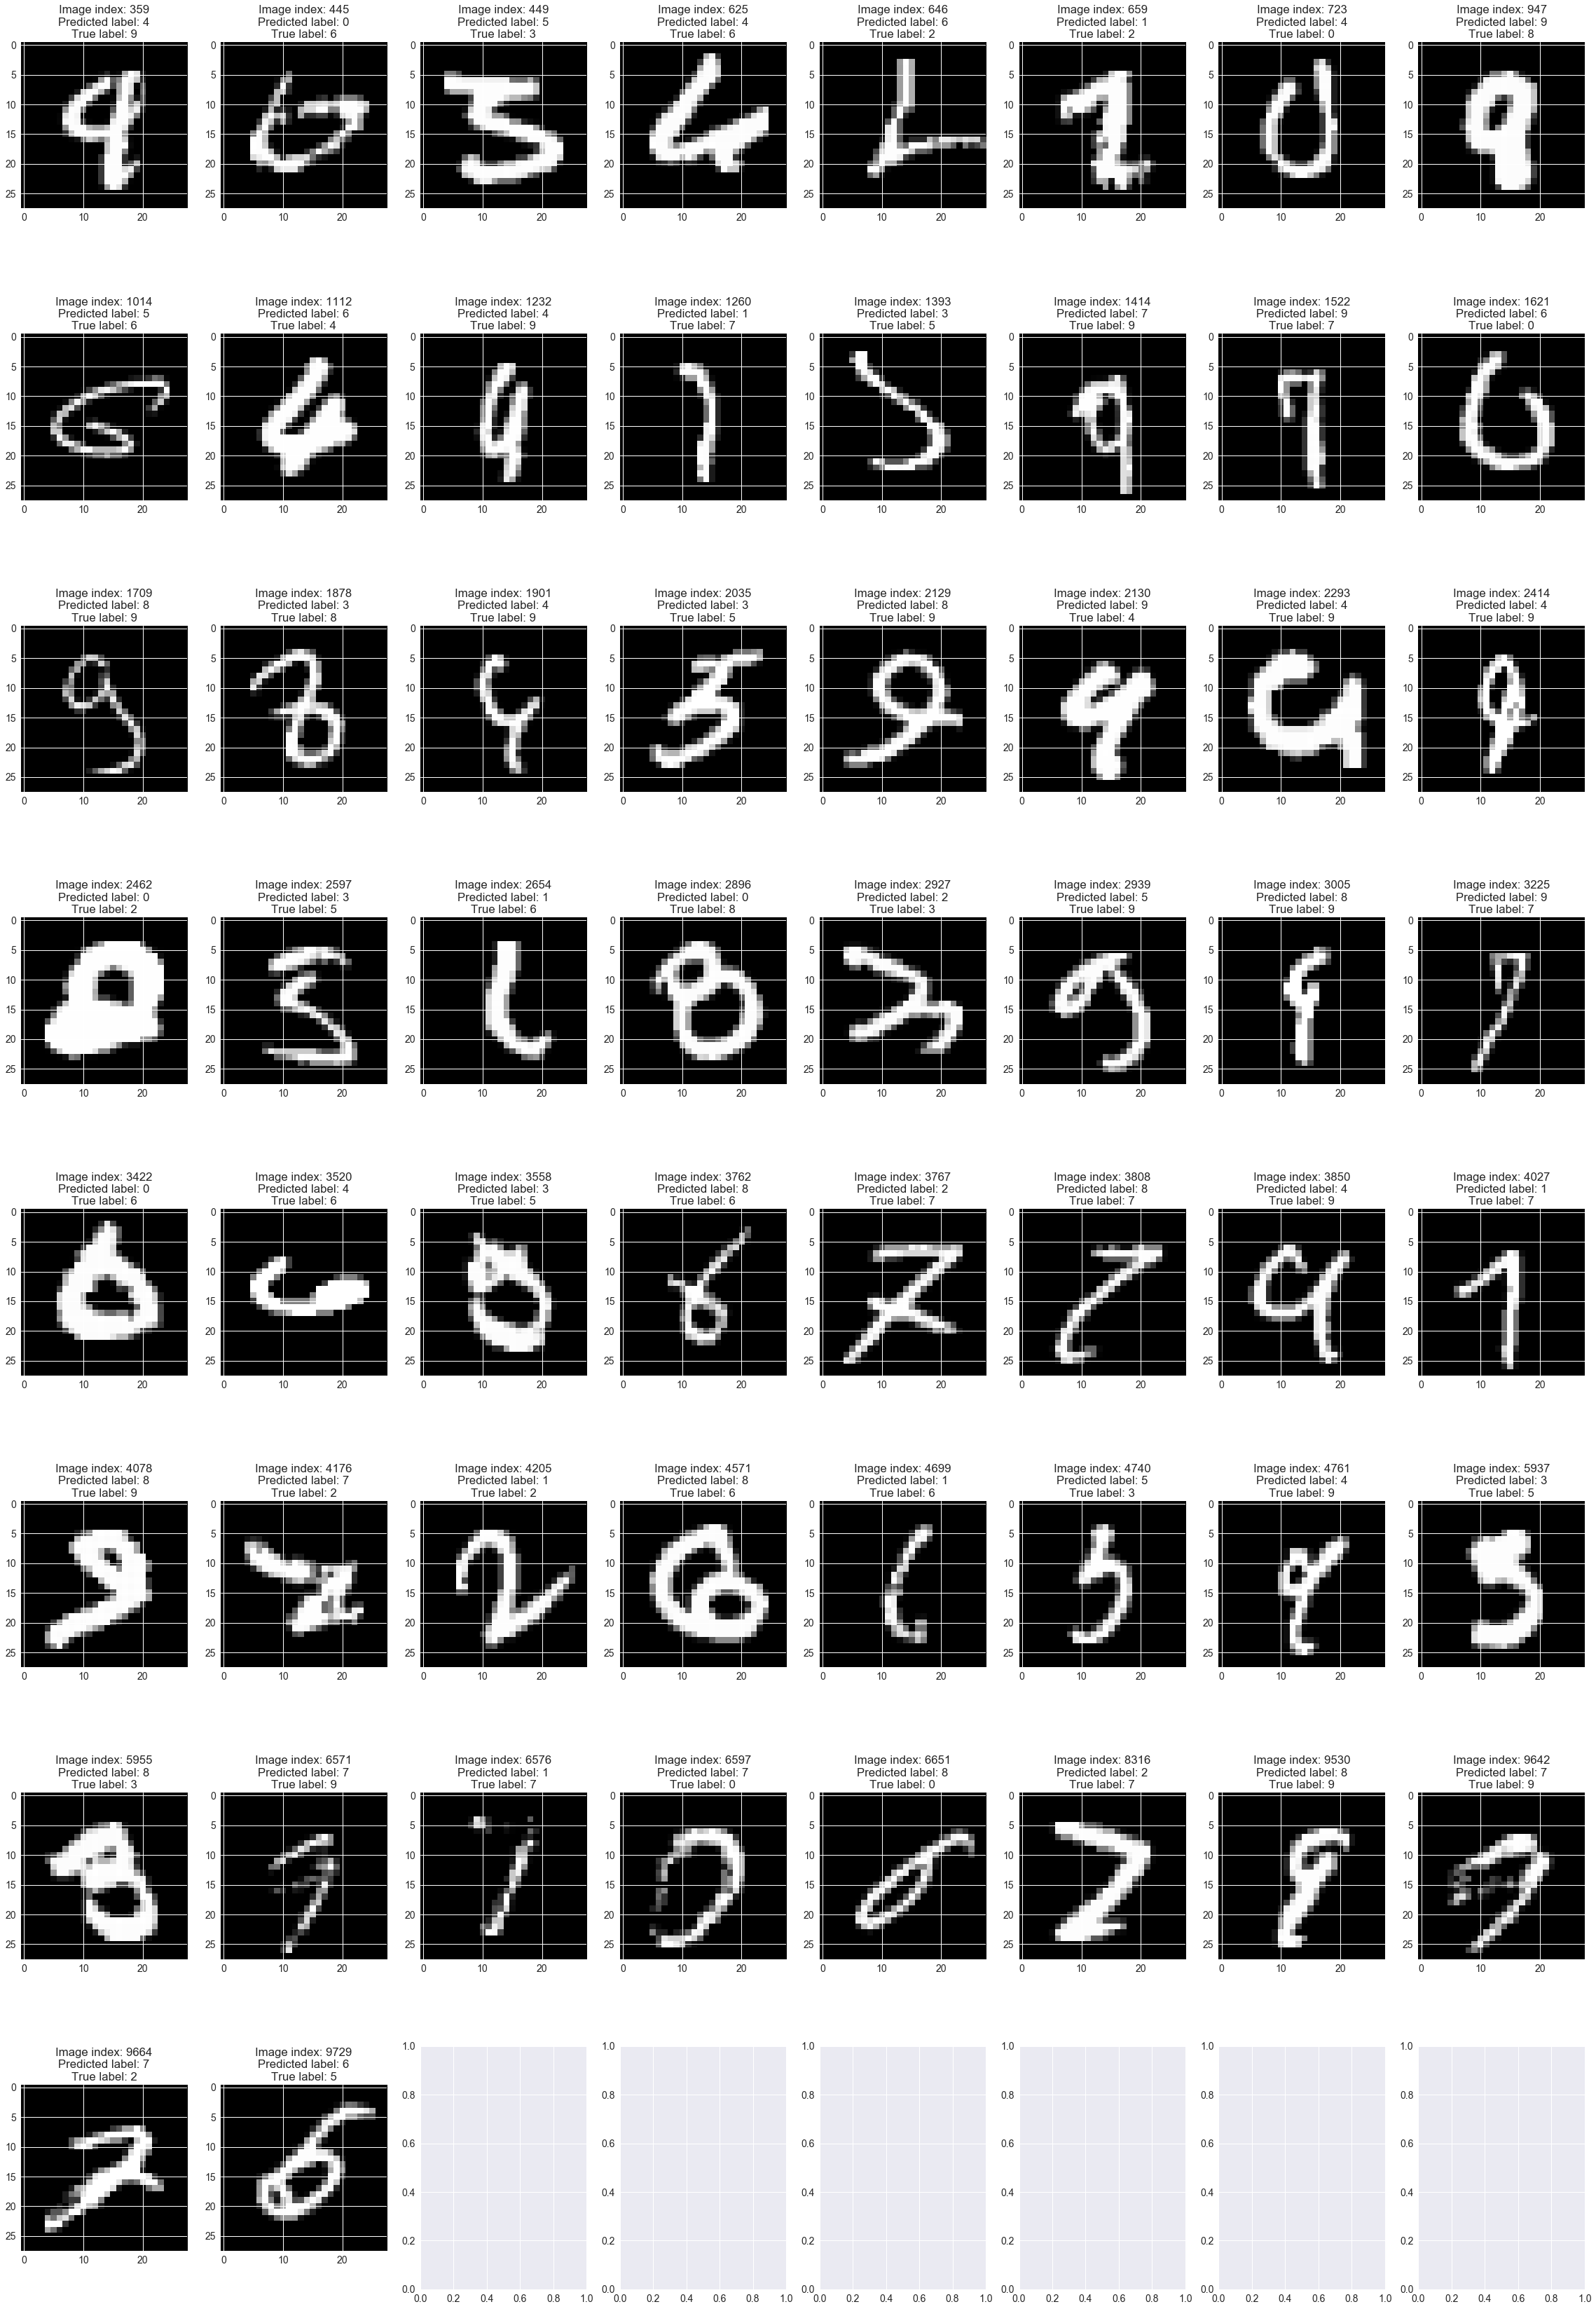

In [65]:
# Extension 4 - Display actual and predicted classes for all errors with the index and image

n = 0
ncols = 8
nrows = count_errors//ncols + 1


# define figure 2 to display the wrong-predicted images
#fig2, ax2 = plt.subplots(nrows, ncols, figsize=(15, 90))
fig2, ax2 = plt.subplots(nrows, ncols, figsize=(40, 60))

for row in range(nrows):
    for col in range(ncols):
        # find out the test errors
        ax2[row,col].imshow((x_test_errors[n]).reshape((28,28)), cmap = 'gray')         
        # setting the sub title of each subplot of the wrong-predicted images
        ax2[row,col].set_title("Image index: {}\nPredicted label: {}\nTrue label: {}".format(error_index[0][n], y_pred_errors[n],y_actual_errors[n]))
        if n == (count_errors - 1):
            break
        else:
            n = n + 1


In [67]:
# Extra trial - observe the class with max accuracy
class_count = []
for i in range(0,10):
    new = conf_mat[i].sum()
    class_count.append(new)
#print(class_count)

dig_value = np.diagonal(conf_mat)
#print(dig_value)


class_accuracy_list = []
for _ in range(0,10):
    class_accuracy = round(dig_value[_]/class_count[_], 4)
    class_accuracy_list.append(class_accuracy)
print('classification accuracy of each class:')
print(class_accuracy_list)

print('-------------------------------------------------------------------------------')
max_accuracy = np.max(class_accuracy_list)
max_accuracy_index = np.argmax(class_accuracy_list)
print('maximal classification accuracy is: ', max_accuracy)
print('maximal classification accuracy index of class is: ', max_accuracy_index)

print('-------------------------------------------------------------------------------')
min_accuracy = np.min(class_accuracy_list)
min_accuracy_index = np.argmin(class_accuracy_list)
print('minimal classification accuracy is: ', min_accuracy)
print('minimal classification accuracy index of class is: ', min_accuracy_index)

classification accuracy of each class:
[0.9959, 1.0, 0.9942, 0.996, 0.998, 0.9933, 0.9906, 0.9922, 0.9969, 0.9841]
-------------------------------------------------------------------------------
maximal classification accuracy is:  1.0
maximal classification accuracy index of class is:  1
-------------------------------------------------------------------------------
minimal classification accuracy is:  0.9841
minimal classification accuracy index of class is:  9
